In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Loading the dataset

In [3]:
df=pd.read_csv('tips.csv')

### Checking for Missing Values

In [4]:
df.isnull().sum()

Unnamed: 0     0
total_bill    39
tip            0
sex            0
smoker         0
day            0
time           0
size           0
dtype: int64

#### Filling the missing values using mean

In [5]:
m=df['total_bill'].mean()
m

21.36019512195122

In [6]:
df['total_bill']=df['total_bill'].fillna(m)
df

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
0,0,16.990000,1.01,Female,No,Sun,Dinner,2
1,1,21.360195,1.66,Male,No,Sun,Dinner,3
2,2,21.010000,3.50,Male,No,Sun,Dinner,3
3,3,23.680000,3.31,Male,No,Sun,Dinner,2
4,4,24.590000,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...,...
239,239,29.030000,5.92,Male,No,Sat,Dinner,3
240,240,27.180000,2.00,Female,Yes,Sat,Dinner,2
241,241,22.670000,2.00,Male,Yes,Sat,Dinner,2
242,242,17.820000,1.75,Male,No,Sat,Dinner,2


In [7]:
df.isnull().sum().sum()

0

### Catogarical Variable handling

In [8]:
df.head()

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
0,0,16.990000,1.01,Female,No,Sun,Dinner,2
1,1,21.360195,1.66,Male,No,Sun,Dinner,3
2,2,21.010000,3.50,Male,No,Sun,Dinner,3
3,3,23.680000,3.31,Male,No,Sun,Dinner,2
4,4,24.590000,3.61,Female,No,Sun,Dinner,4


In [9]:
for col in df.columns:
    print(col,":", len(df[col].unique()),' labels')

Unnamed: 0 : 244  labels
total_bill : 195  labels
tip : 123  labels
sex : 2  labels
smoker : 2  labels
day : 4  labels
time : 2  labels
size : 6  labels


In [10]:
cc =['sex','smoker','day','time']

#### Using one hot encoding 

In [11]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
ohe.fit(df[cc])


OneHotEncoder()

In [12]:
encoded=ohe.transform(df[cc])
encoded_df=pd.DataFrame(encoded.toarray(), columns=ohe.get_feature_names_out(cc))
final_df = pd.concat([df.drop(columns=cc), encoded_df], axis=1)
final_df

,Unnamed: 0,total_bill,tip,size,sex_Female,sex_Male,smoker_No,smoker_Yes,day_Fri,day_Sat,day_Sun,day_Thur,time_Dinner,time_Lunch
0,0,16.990000,1.01,2,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1,21.360195,1.66,3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,2,21.010000,3.50,3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,3,23.680000,3.31,2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,4,24.590000,3.61,4,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,239,29.030000,5.92,3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
240,240,27.180000,2.00,2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
241,241,22.670000,2.00,2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
242,242,17.820000,1.75,2,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


## Scaling

In [13]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
final_df.drop(columns=['Unnamed: 0'], inplace=True)
df_minmax = pd.DataFrame(min_max.fit_transform(final_df), columns= final_df.columns)
df_minmax.head()

,total_bill,tip,size,sex_Female,sex_Male,smoker_No,smoker_Yes,day_Fri,day_Sat,day_Sun,day_Thur,time_Dinner,time_Lunch
0,0.291579,0.001111,0.2,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.383121,0.073333,0.4,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.375786,0.277778,0.4,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.431713,0.256667,0.2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.450775,0.290000,0.6,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


(array([ 1.,  6., 10.,  0., 24., 37., 28., 62., 18., 13., 10.,  9.,  5.,
         7.,  3.,  4.,  1.,  2.,  3.,  1.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

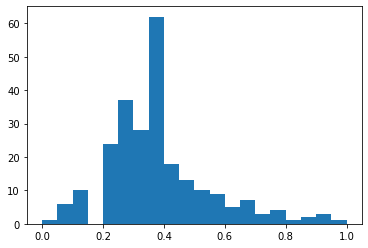

In [14]:
plt.hist(df_minmax['total_bill'], bins = 20)

(array([15., 26., 55., 24., 41., 25., 20.,  7., 13.,  6.,  4.,  1.,  4.,
         0.,  1.,  0.,  0.,  1.,  0.,  1.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

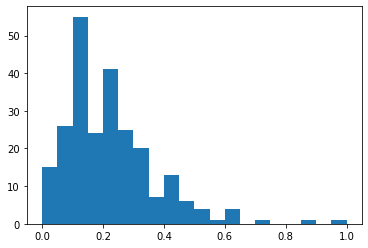

In [15]:
plt.hist(df_minmax['tip'], bins = 20)

(array([  4.,   0.,   0., 156.,   0.,   0.,   0.,   0.,  38.,   0.,   0.,
          0.,  37.,   0.,   0.,   5.,   0.,   0.,   0.,   4.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

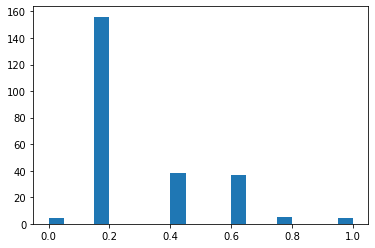

In [19]:
plt.hist(df_minmax['size'], bins = 20)

(array([157.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  87.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

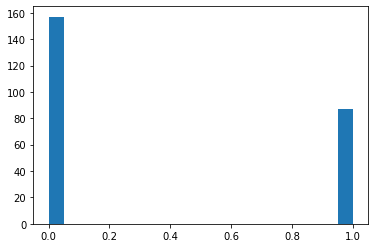

In [20]:
plt.hist(df_minmax['sex_Female'], bins = 20)

In [22]:
# Create a new feature representing the average tip percentage for each dining party size.
final_df['tip_percentage'] = (final_df['tip'] / final_df['total_bill']) * 100
final_df.head()

,total_bill,tip,size,sex_Female,sex_Male,smoker_No,smoker_Yes,day_Fri,day_Sat,day_Sun,day_Thur,time_Dinner,time_Lunch,tip_percentage
0,16.990000,1.01,2,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.944673
1,21.360195,1.66,3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,7.771465
2,21.010000,3.50,3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,16.658734
3,23.680000,3.31,2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,13.978041
4,24.590000,3.61,4,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,14.680765


In [31]:
#  Create a new feature based on total bill and tips if total bill is greater than 10$ and tips is greater
#than 3$ mark as Highest-bills-with-tips otherwise Normal-bills

import pandas as pd
final_df['bill_type'] = 'Normal-bills'
final_df.loc[(final_df['total_bill'] > 10) & (final_df['tip'] > 3), 'bill_type'] = 'Highest-bills-with-tips'
final_df.head()

,total_bill,tip,size,sex_Female,sex_Male,smoker_No,smoker_Yes,day_Fri,day_Sat,day_Sun,day_Thur,time_Dinner,time_Lunch,tip_percentage,bill_type
0,16.990000,1.01,2,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.944673,Normal-bills
1,21.360195,1.66,3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,7.771465,Normal-bills
2,21.010000,3.50,3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,16.658734,Highest-bills-with-tips
3,23.680000,3.31,2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,13.978041,Highest-bills-with-tips
4,24.590000,3.61,4,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,14.680765,Highest-bills-with-tips
